# Step 1: Import libraries


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os
import pandas as pd

# Step 2: Open and pre-process the data

In [2]:
file = open("Frankenstein.txt", "r", encoding = "utf8")
 
# store file in list
lines = []
for i in file:
    lines.append(i)
 
# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 
 
#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space
 
#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usin'

In [3]:
len(data)

436625

# Step 4: Implement tokenization and make additional adjustments

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
 
# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))
 
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 98, 199, 683, 4, 301, 35, 1, 601, 1617, 25, 683, 31, 22, 1]

In [5]:
len(sequence_data)

78382

In [6]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7492


In [7]:
sequences = []
 
for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]    

The Length of sequences are:  78379


array([[   1,   98,  199,  683],
       [  98,  199,  683,    4],
       [ 199,  683,    4,  301],
       [ 683,    4,  301,   35],
       [   4,  301,   35,    1],
       [ 301,   35,    1,  601],
       [  35,    1,  601, 1617],
       [   1,  601, 1617,   25],
       [ 601, 1617,   25,  683],
       [1617,   25,  683,   31]])

In [8]:
X = []
y = []
 
for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
     
X = np.array(X)
y = np.array(y)

In [9]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[   1   98  199]
 [  98  199  683]
 [ 199  683    4]
 [ 683    4  301]
 [   4  301   35]
 [ 301   35    1]
 [  35    1  601]
 [   1  601 1617]
 [ 601 1617   25]
 [1617   25  683]]
Response:  [ 683    4  301   35    1  601 1617   25  683   31]


In [10]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

# Step 4: Creating the model

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             74920     
                                                                 
 lstm (LSTM)                 (None, 3, 100)            44400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7492)              756692    
                                                                 
Total params: 966,512
Trainable params: 966,512
Non-trainable params: 0
_________________________________________________________________


# Step 5: Plot the model

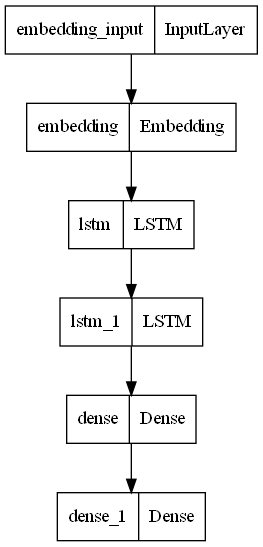

In [13]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model
 
keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

# Step 6: Train the model

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
 
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=10, batch_size=15, callbacks=[checkpoint])

Epoch 1/10
5224/5226 [============================>.] - ETA: 0s - loss: 6.6018
Epoch 1: loss improved from inf to 6.60177, saving model to next_words.h5
5226/5226 [==============================] - 112s 19ms/step - loss: 6.6018
Epoch 2/10
5225/5226 [============================>.] - ETA: 0s - loss: 6.1523
Epoch 2: loss improved from 6.60177 to 6.15213, saving model to next_words.h5
5226/5226 [==============================] - 100s 19ms/step - loss: 6.1521
Epoch 3/10
5226/5226 [==============================] - ETA: 0s - loss: 5.8557
Epoch 3: loss improved from 6.15213 to 5.85566, saving model to next_words.h5
5226/5226 [==============================] - 98s 19ms/step - loss: 5.8557
Epoch 4/10
5224/5226 [============================>.] - ETA: 0s - loss: 5.5793
Epoch 4: loss improved from 5.85566 to 5.57948, saving model to next_words.h5
5226/5226 [==============================] - 101s 19ms/step - loss: 5.5795
Epoch 5/10
5224/5226 [============================>.] - ETA: 0s - loss: 5.359

In [15]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle
 
# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))
 
def Predict_Next_Words(model, tokenizer, text):
 
  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
   
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
   
  print(predicted_word)
  return predicted_word

In [ ]:
while(True):
  text = input("Enter your line: ")
   
  if text == "0":
      print("Execution completed.....")
      break
   
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
         
          Predict_Next_Words(model, tokenizer, text)
           
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line:  the North Pacific
['the', 'North', 'Pacific']
1/1 [==============================] - 3s 3s/step
of
Enter your line: them increased that
['them', 'increased', 'that']
1/1 [==============================] - 0s 64ms/step
i
Enter your line:  which I dedicated
['which', 'I', 'dedicated']
1/1 [==============================] - 0s 79ms/step
myself
Enter your line: my captain offered
['my', 'captain', 'offered']
1/1 [==============================] - 0s 48ms/step
me
